# 0.1 Week 4 Lab Exercise

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Check device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 1) Implement two layer Feed Forward Neural Network for XOR Logic Gate with2-bit Binary Input using Sigmoid activation. Verify the number of learnable parameters in the model

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)
Epoch 0/1000 , Loss: 0.28139788284897804
('linear1.weight', Parameter containing:
tensor([[ 0.4740,  0.5545],
        [-0.1219,  0.6318]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([-0.1783,  0.1207], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-0.3375,  0.3201]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containing:
tensor([0.5076], device='cuda:0', requires_grad=True))
The input is tensor([0., 1.], device='cuda:0')
Output y predicted is tensor([0.5250], device='cuda:0', grad_fn=<ViewBackward0>)


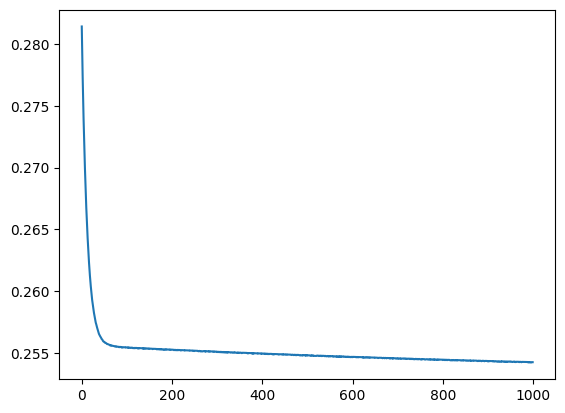

In [4]:
loss_list=[]
torch.manual_seed(42)

X=torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float32)
Y=torch.tensor([0,1,1,0],dtype=torch.float32)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel,self).__init__()
        self.linear1=nn.Linear(2,2,bias=True)
        self.activation1=nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1, bias=True)

    def forward(self,x):
        x=self.linear1(x)
        x=self.activation1(x)
        x=self.linear2(x)
        return x

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X=X
        self.Y=Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx].to(device), self.Y[idx].to(device)

def train_one_epoch(epoch_index):
    totalloss=0.0
    for i,data in enumerate(train_data_loader):
        inputs,labels=data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs=model(inputs)
        loss=loss_fn(outputs.flatten(),labels)
        loss.backward()
        optimizer.step()
        totalloss+=loss.item()
    return totalloss/(len(train_data_loader)*batch_size)

full_dataset = MyDataset(X, Y)
batch_size = 1

train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = XORModel().to(device)
print(model)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)
epochs=1000
for epoch in range(epochs):
    model.train(True)
    avg_loss=train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch%1000 == 0:
        print(f'Epoch {epoch}/{epochs} , Loss: {avg_loss}')


for param in model.named_parameters():
    print(param)
input=torch.tensor([0,1],dtype=torch.float32).to(device)
model.eval()
print("The input is {}".format(input))
print("Output y predicted is {}".format(model(input)))
plt.plot(loss_list)
plt.show()


## 2) Repeat Qn 1 by modifying the activation function to ReLU.

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)
Epoch 0/1000 , Loss: 0.28828215412795544
('linear1.weight', Parameter containing:
tensor([[ 0.6052,  0.6544],
        [-0.6746,  0.6832]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([-0.6281, -0.0190], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-0.7880,  0.7802]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containing:
tensor([0.5000], device='cuda:0', requires_grad=True))
The input is tensor([0., 1.], device='cuda:0')
Output y predicted is tensor([0.9974], device='cuda:0', grad_fn=<ViewBackward0>)


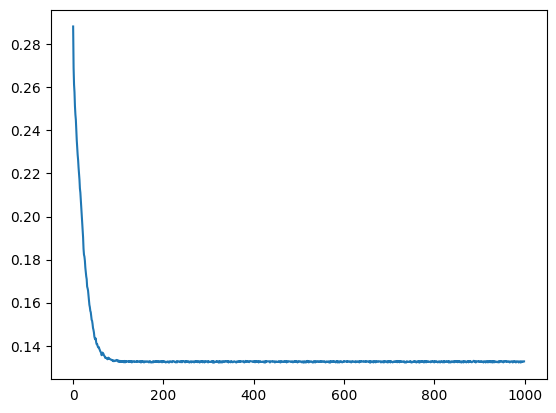

In [5]:
loss_list=[]
torch.manual_seed(42)
X=torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float32)
Y=torch.tensor([0,1,1,0],dtype=torch.float32)
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel,self).__init__()
        self.linear1=nn.Linear(2,2,bias=True)
        self.activation1=nn.ReLU()
        self.linear2 = nn.Linear(2, 1, bias=True)
    def forward(self,x):
        x=self.linear1(x)
        x=self.activation1(x)
        x=self.linear2(x)
        return x
class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X=X
        self.Y=Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx].to(device), self.Y[idx].to(device)
def train_one_epoch(epoch_index):
    totalloss=0.0
    for i,data in enumerate(train_data_loader):
        inputs,labels=data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs=model(inputs)
        loss=loss_fn(outputs.flatten(),labels)
        loss.backward()
        optimizer.step()
        totalloss+=loss.item()
    return totalloss/(len(train_data_loader)*batch_size)

full_dataset = MyDataset(X, Y)
batch_size = 1

train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = XORModel().to(device)
print(model)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)
epochs=1000
for epoch in range(epochs):
    model.train(True)
    avg_loss=train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch%1000 == 0:
        print(f'Epoch {epoch}/{epochs} , Loss: {avg_loss}')
for param in model.named_parameters():
    print(param)
input=torch.tensor([0,1],dtype=torch.float32).to(device)
model.eval()
print("The input is {}".format(input))
print("Output y predicted is {}".format(model(input)))
plt.plot(loss_list)
plt.show()

# 3) Manually verify the output values by taking system generated values of weights and biases for both Linear1 and Linear2 layers for Qn 1 and apply the transformations to input X and implement the same.

In [6]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.linear1 = nn.Linear(2, 4, bias=True) 
        self.activation1 = nn.Sigmoid()  
        self.linear2 = nn.Linear(4, 1, bias=True) 

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x
model = XORModel()

X = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]], dtype=torch.float32)
output = model(X)
linear1_weights = model.linear1.weight.data
linear1_bias = model.linear1.bias.data
linear2_weights = model.linear2.weight.data
linear2_bias = model.linear2.bias.data
print(f"Linear1 Weights: \n{linear1_weights}")
print(f"Linear1 Bias: \n{linear1_bias}")
print(f"Linear2 Weights: \n{linear2_weights}")
print(f"Linear2 Bias: \n{linear2_bias}")
X_ = X
linear1_output = torch.matmul(X_, linear1_weights.T) + linear1_bias  # Linear transformation
sigmoid_output = torch.sigmoid(linear1_output)
final_output = torch.matmul(sigmoid_output, linear2_weights.T) + linear2_bias
print("\nManually computed output using weights and biases:")
print(final_output)

Linear1 Weights: 
tensor([[-0.6661, -0.1330],
        [ 0.4173, -0.5185],
        [-0.3308,  0.4779],
        [ 0.2031,  0.3306]])
Linear1 Bias: 
tensor([-0.6594,  0.4500, -0.1542,  0.1486])
Linear2 Weights: 
tensor([[ 0.4042, -0.4608,  0.1431, -0.4520]])
Linear2 Bias: 
tensor([0.3702])

Manually computed output using weights and biases:
tensor([[ 0.0498],
        [ 0.0775],
        [-0.0803],
        [-0.0527]])


# ### 4) Implement Feed Forward Neural Network with two hidden layers for classifying handwritten digits using MNIST dataset. Display the classification accuracy in the form of a Confusion matrix. Verify the number of learnable parameters in the model.


Epoch [1/5], Loss: 0.3305, Accuracy: 89.67%
Epoch [2/5], Loss: 0.1650, Accuracy: 94.93%
Epoch [3/5], Loss: 0.1305, Accuracy: 95.90%
Epoch [4/5], Loss: 0.1128, Accuracy: 96.44%
Epoch [5/5], Loss: 0.1008, Accuracy: 96.76%
Test Accuracy: 97.45%


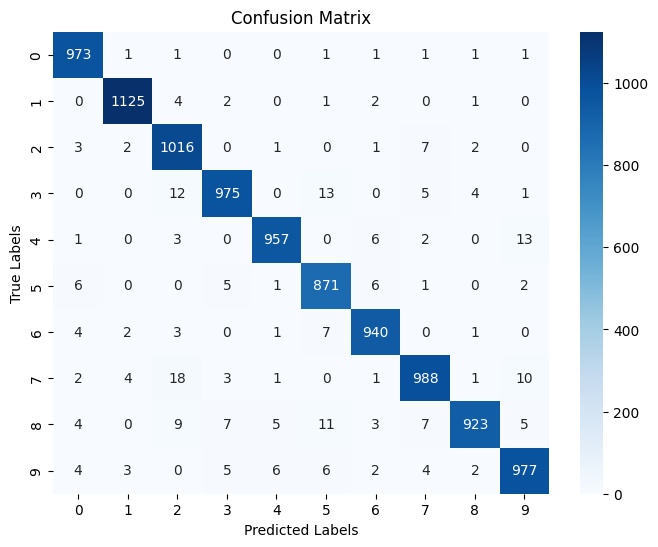

Total learnable parameters: 535818


In [7]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

class FFNN(nn.Module):
    def __init__(self):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 512) 
        self.fc2 = nn.Linear(512, 256)    
        self.fc3 = nn.Linear(256, 10)     
        self.dropout = nn.Dropout(0.2)    

    def forward(self, x):
        x = x.view(-1, 28*28)  
        x = F.relu(self.fc1(x))  
        x = self.dropout(x)      
        x = F.relu(self.fc2(x))  
        x = self.fc3(x)         
        return x
model = FFNN()
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}, Accuracy: {train_accuracy:.2f}%')
model.eval()  
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total learnable parameters: {total_params}')